# Least squares

Nejdřív tu nechám příklad ze zadání, kde můžeme vidět, že predicke jediné hodnoty (poslední) dokážeme s velmi nízkou hodnotou MSE.
Ještě jsem teda chtěl uvidět, jak rychle roste MSE, když budeme predikovat víc než jen jednu hodnotu.

In [8]:
import sklearn.datasets
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as mets


estimator = lm.LinearRegression()
diabetes = sklearn.datasets.load_diabetes()

# učíme se na všech datech kromě posledního
estimator.fit(diabetes.data[:-1], diabetes.target[:-1])
# predikujeme poslední dato
prediction = estimator.predict(diabetes.data[-1:])
print(f"Predikce: {prediction}")
print(f"Reálná hodnota: {diabetes.target[-1:]}")
print(mets.mean_squared_error(diabetes.target[-1:], prediction), "\n")

estimator.fit(diabetes.data[:-2], diabetes.target[:-2])
prediction = estimator.predict(diabetes.data[-2:])
print(f"Predikce: {prediction}")
print(f"Reálná hodnota: {diabetes.target[-2:]}")
print(mets.mean_squared_error(diabetes.target[-2:], prediction), "\n")


estimator.fit(diabetes.data[:-3], diabetes.target[:-3])
prediction = estimator.predict(diabetes.data[-3:])
print(f"Predikce: {prediction}")
print(f"Reálná hodnota: {diabetes.target[-3:]}")
print(mets.mean_squared_error(diabetes.target[-3:], prediction))


Predikce: [53.18352733]
Reálná hodnota: [57.]
14.56546363356691 

Predikce: [211.74935211  53.19194583]
Reálná hodnota: [220.  57.]
41.287233612015264 

Predikce: [121.17753103 211.81625925  53.34516457]
Reálná hodnota: [132. 220.  57.]
65.81908974505352


## Trénování na 2/3 dat

Sice to není v zadání, ale pro jednodušší pochopení, jak to všechno vlastně vypadá, trochu jsem si hrál s množstvím trénovacích dat a vygrafoval jsem (snad správně) opravdové a predikční hodnoty.
Nejdřív jsem predikoval každou třetí hodnotu. MSE vyšlo 2922, ale můžeme vidět, že predikované hodnoty bývají aspoň ve stejné polovině hodnoty (horní, či dolní).

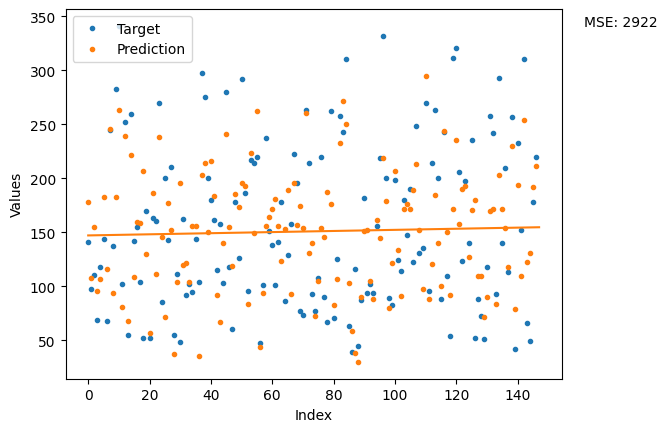

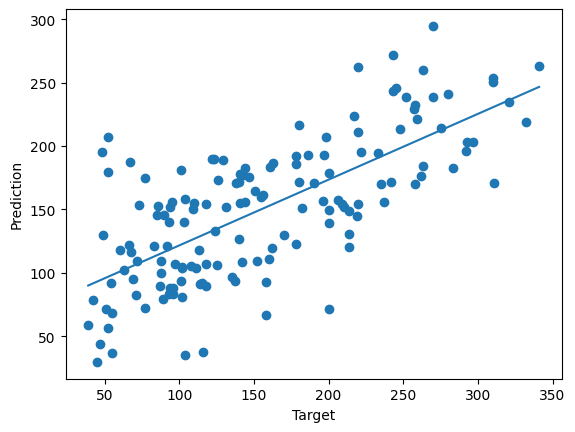

In [9]:
estimator = lm.LinearRegression()
diabetes = sklearn.datasets.load_diabetes()

learningData = []
learningTargets = []

predictionData = []
predictionTargets = []
predictionX = []

# učíme se 2/3 datech
for x in range(0, len(diabetes.data)-2, 3):
    learningData.append(diabetes.data[x])
    learningData.append(diabetes.data[x+1])

    learningTargets.append(diabetes.target[x])
    learningTargets.append(diabetes.target[x+1])

    predictionData.append(diabetes.data[x+2])
    predictionTargets.append(diabetes.target[x+2])
    predictionX.append(x+2)

estimator.fit(learningData, learningTargets)

predictions = estimator.predict(predictionData)

plt.plot(predictionTargets, '.', label="Target")
plt.plot(predictions, '.', c="tab:orange", label="Prediction")
plt.xlabel("Index")
plt.ylabel("Values")
m, b = np.polyfit([x for x in range(len(predictions))], predictions, 1)
xseq = np.linspace(0, len(predictions), num=100)
plt.plot(xseq, b + m*xseq, "-", c="tab:orange")
plt.text(len(predictions)*1.1, max(max(predictionTargets), max(predictions)), f"MSE: {round(mets.mean_squared_error(predictionTargets, predictions))}")
plt.legend()
plt.show()

plt.scatter(predictionTargets, predictions)
plt.xlabel("Target")
plt.ylabel("Prediction")
m, b = np.polyfit(predictionTargets, predictions, 1)
xseq = np.linspace(min(predictionTargets), max(predictionTargets), num=100)
plt.plot(xseq, b + m*xseq, "-")
plt.show()


## Trénování na 4/5 dat

Další rozumný krok je samozřejmě zvětšit množství trénovacích dat. Predikce v grafu nevypadají, že by byly o moc přesnější, a dokonce vyšlo
MSE na 3281, větší než předtím.

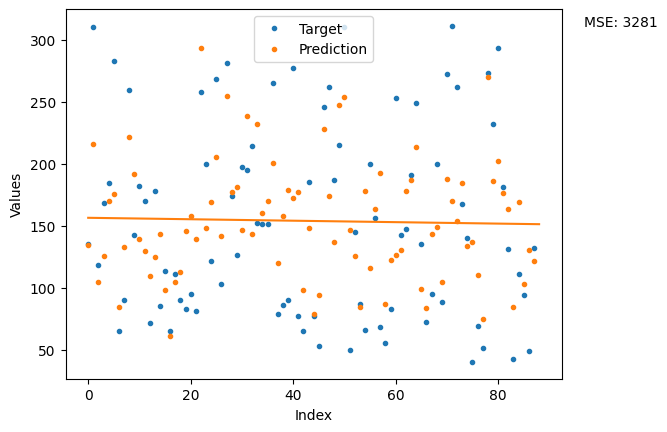

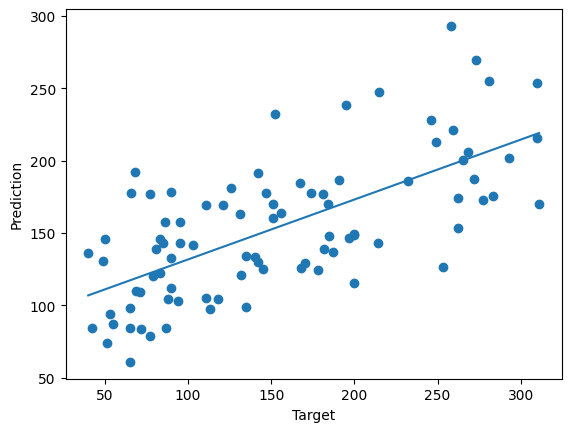

In [10]:
estimator = lm.LinearRegression()
diabetes = sklearn.datasets.load_diabetes()

learningData = []
learningTargets = []

predictionData = []
predictionTargets = []
predictionX = []

# učíme se 4/5 datech
for x in range(0, len(diabetes.data)-2, 5):
    learningData.append(diabetes.data[x])
    learningData.append(diabetes.data[x+1])
    learningData.append(diabetes.data[x+2])
    learningData.append(diabetes.data[x+3])

    learningTargets.append(diabetes.target[x])
    learningTargets.append(diabetes.target[x+1])
    learningTargets.append(diabetes.target[x+2])
    learningTargets.append(diabetes.target[x+3])

    predictionData.append(diabetes.data[x+4])
    predictionTargets.append(diabetes.target[x+4])
    predictionX.append(x+4)

estimator.fit(learningData, learningTargets)

predictions = estimator.predict(predictionData)

plt.plot(predictionTargets, '.', label="Target")
plt.plot(predictions, '.', c="tab:orange", label="Prediction")
plt.xlabel("Index")
plt.ylabel("Values")
m, b = np.polyfit([x for x in range(len(predictions))], predictions, 1)
xseq = np.linspace(0, len(predictions), num=100)
plt.plot(xseq, b + m*xseq, "-", c="tab:orange")
plt.text(len(predictions)*1.1, max(max(predictionTargets), max(predictions)), f"MSE: {round(mets.mean_squared_error(predictionTargets, predictions))}")
plt.legend()
plt.show()

plt.scatter(predictionTargets, predictions)
plt.xlabel("Target")
plt.ylabel("Prediction")
m, b = np.polyfit(predictionTargets, predictions, 1)
xseq = np.linspace(min(predictionTargets), max(predictionTargets), num=100)
plt.plot(xseq, b + m*xseq, "-")
plt.show()

## Trénování na 9/10 dat

Opět jsem zvýšil množství trénovacích dat, tentokrát na všechny, až na posledních 40, což je přibližně 10% (počet dat je někde okolo 440)
Tady už je rozdíl trochu víc výrazný. Některé predikce jsou opravdu dost přesné, některé jsou stále úplně mimo. TO se asi dá očekávat, když data vypadají v zásadě náhodná. MSE se snížilo o dost na 1751. Dost zajímavé je, že na tento krátký, hlavně po sobě jdoucí, úsek predikovaných hodnot má trend snižování (lze vidět v grafu).

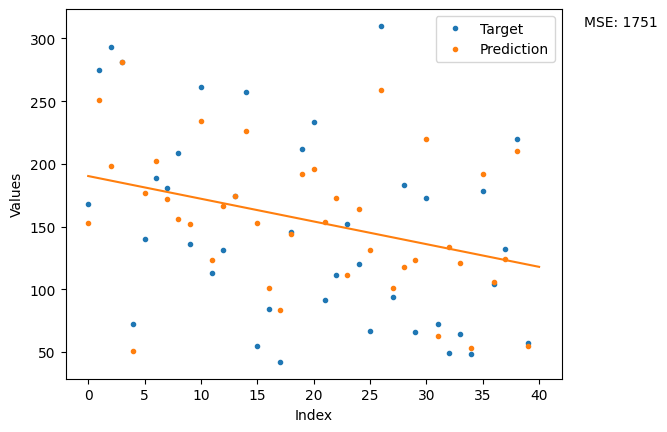

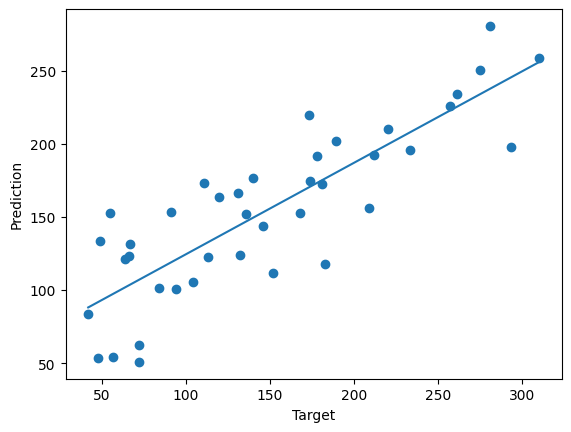

In [11]:
estimator = lm.LinearRegression()
diabetes = sklearn.datasets.load_diabetes()

learningData = []
learningTargets = []
learningX = []

predictionData = []
predictionTargets = []
predictionX = []

# učíme se cca 9/10 datech
learningData = diabetes.data[:-40]
learningTargets = diabetes.target[:-40]

predictionData = diabetes.data[-40:]
predictionTargets = diabetes.target[-40:]
predictionX = []
for x in range(len(predictionData)): predictionX.append(x+len(learningData))

estimator.fit(learningData, learningTargets)

predictions = estimator.predict(predictionData)

plt.plot(predictionTargets, '.', label="Target")
plt.plot(predictions, '.', c="tab:orange", label="Prediction")
plt.xlabel("Index")
plt.ylabel("Values")
m, b = np.polyfit([x for x in range(len(predictions))], predictions, 1)
xseq = np.linspace(0, len(predictions), num=100)
plt.plot(xseq, b + m*xseq, "-", c="tab:orange")
plt.text(len(predictions)*1.1, max(max(predictionTargets), max(predictions)), f"MSE: {round(mets.mean_squared_error(predictionTargets, predictions))}")
plt.legend()
plt.show()

plt.scatter(predictionTargets, predictions)
plt.xlabel("Target")
plt.ylabel("Prediction")
m, b = np.polyfit(predictionTargets, predictions, 1)
xseq = np.linspace(min(predictionTargets), max(predictionTargets), num=100)
plt.plot(xseq, b + m*xseq, "-")
plt.show()

# Elastic Net Regression

Ještě jsem chtěl ze zajímavosti vyzkoušet jiný model. Upřímně jsem moc nepochopil, jaké přesně byly rozdíly mezi modely.
Ridge jsem ještě pochopil, že omezuje velikost koeficientů, ale u dalších jsem si moc nevěděl rady.
Hlavně mě jen přišlo zajímavý, jak jiný model (Elastic net) nám vrací predikce úplně jiné, než bychom chtěli. Dává to ale smysl, že jiné modely se hodí na jiná data a část kouzla je umět vybrat co zrovna potřebuješ.

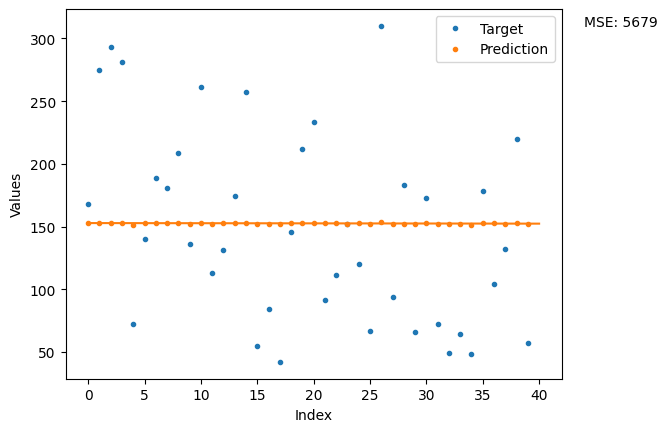

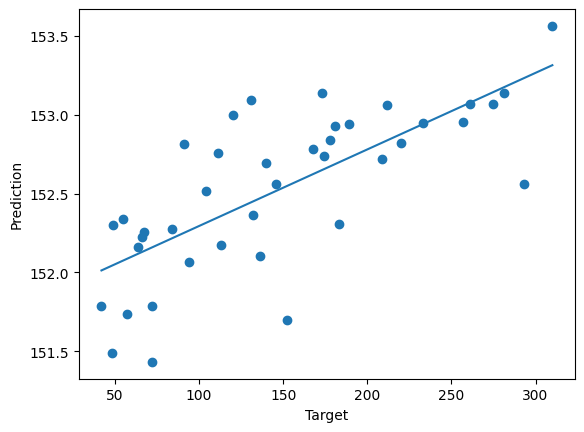

In [12]:
estimator = lm.ElasticNet()
diabetes = sklearn.datasets.load_diabetes()

learningData = []
learningTargets = []
learningX = []

predictionData = []
predictionTargets = []
predictionX = []

# učíme se cca 9/10 datech
learningData = diabetes.data[:-40]
learningTargets = diabetes.target[:-40]

predictionData = diabetes.data[-40:]
predictionTargets = diabetes.target[-40:]
predictionX = []
for x in range(len(predictionData)): predictionX.append(x+len(learningData))

estimator.fit(learningData, learningTargets)

predictions = estimator.predict(predictionData)

plt.plot(predictionTargets, '.', label="Target")
plt.plot(predictions, '.', c="tab:orange", label="Prediction")
plt.xlabel("Index")
plt.ylabel("Values")
m, b = np.polyfit([x for x in range(len(predictions))], predictions, 1)
xseq = np.linspace(0, len(predictions), num=100)
plt.plot(xseq, b + m*xseq, "-", c="tab:orange")
plt.text(len(predictions)*1.1, max(max(predictionTargets), max(predictions)), f"MSE: {round(mets.mean_squared_error(predictionTargets, predictions))}")
plt.legend()
plt.show()

plt.scatter(predictionTargets, predictions)
plt.xlabel("Target")
plt.ylabel("Prediction")
m, b = np.polyfit(predictionTargets, predictions, 1)
xseq = np.linspace(min(predictionTargets), max(predictionTargets), num=100)
plt.plot(xseq, b + m*xseq, "-")
plt.show()

# Zpět k zadání

Nejprve jsem si prošel různé metriky podle [dokumentaci](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).
Zastavil jsem u *Mean Poisson, Gamma, and Tweedie deviances*, protože jsem už prestával chápat co přesně vyjádřujou.
Přijde mi, že $R^2$ je dobrá metrika. Jestli to chápu správně, tak vyjadřuje s jakou přesností pravděpodobně bude předpovězena další hodnota.
Tedy $R^2 = 0,6938$ znamená, že další hodnota bude předpovězena s 70% přesností, či bude nejspíš chybná o 30% opravdové hodnoty.


R^2: 0.6938156602543735
MAE: 32.40943116749628
MSE: 1751.0205890673656
MSLE: 0.13181334260971495
MAPE: 0.32641491661655053
MedAE: 25.316086849705158
ME: 97.49160609644059


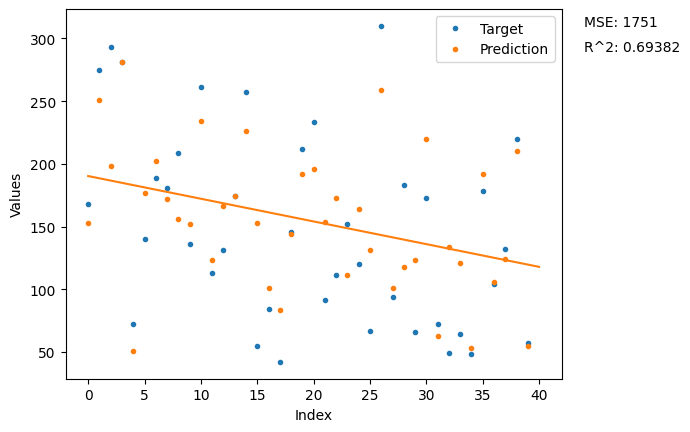

In [13]:
estimator = lm.LinearRegression()
diabetes = sklearn.datasets.load_diabetes()

learningData = []
learningTargets = []
learningX = []

predictionData = []
predictionTargets = []
predictionX = []

# učíme se cca 9/10 datech
learningData = diabetes.data[:-40]
learningTargets = diabetes.target[:-40]

predictionData = diabetes.data[-40:]
predictionTargets = diabetes.target[-40:]
predictionX = []
for x in range(len(predictionData)): predictionX.append(x+len(learningData))

estimator.fit(learningData, learningTargets)

predictions = estimator.predict(predictionData)

# Dělí sumu druhých mocnin odchylek sumou druhých mocnin odchylek od průměrné hodnoty
print("R^2:", mets.r2_score(predictionTargets, predictions))
# Měři jen průměr vzdáleností predikcí od opravdových hodnot
print("MAE:", mets.mean_absolute_error(predictionTargets, predictions))
# Totéž co MAE, ale mocní vzdálenosti na druhou, aby byl větší důraz na větší chyby
print("MSE:", mets.mean_squared_error(predictionTargets, predictions))
# Spíše vhodné pro exponenciální růst hodnot
print("MSLE:", mets.mean_squared_log_error(predictionTargets, predictions))
# Vhodné pro data, kde jsou některé hodnoty hodně malé a některé hodně jiné 
print("MAPE:", mets.mean_absolute_percentage_error(predictionTargets, predictions))
# Medián vzdáleností predikcí od hodnot, místo průměru
print("MedAE:", mets.median_absolute_error(predictionTargets, predictions))
# Největší error v predikci
print("ME:", mets.max_error(predictionTargets, predictions))


plt.plot(predictionTargets, '.', label="Target")
plt.plot(predictions, '.', c="tab:orange", label="Prediction")
plt.xlabel("Index")
plt.ylabel("Values")
m, b = np.polyfit([x for x in range(len(predictions))], predictions, 1)
xseq = np.linspace(0, len(predictions), num=100)
plt.plot(xseq, b + m*xseq, "-", c="tab:orange")
plt.text(len(predictions)*1.1, max(max(predictionTargets), max(predictions)), f"MSE: {round(mets.mean_squared_error(predictionTargets, predictions))}")
plt.text(len(predictions)*1.1, max(max(predictionTargets), max(predictions))-20, f"R^2: {round(mets.r2_score(predictionTargets, predictions), 5)}")
plt.legend()
plt.show()